In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline 
rcParams['figure.figsize']=10,5
sns.set(color_codes=True)

# 1. import the data

In [172]:
df = pd.read_csv('order_lookup_city_CSV.csv')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13666 entries, 0 to 13665
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 13666 non-null  object 
 1   ME_ID                13666 non-null  object 
 2   DISEASE_ID           13666 non-null  object 
 3   ORDER_QUANTITY       13666 non-null  object 
 4   ORDER_FREE_QUANTITY  13666 non-null  float64
 5   SOLD_QUANTITY        13666 non-null  object 
 6   SOLD_FREE            13665 non-null  object 
 7   MEDICINE_NAME        13666 non-null  object 
 8   DISEASE_NAME         13666 non-null  object 
 9   CITY                 13666 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.0+ MB


# 2. Preprocess
## 2.1 check missing value and decide to drop or replace

In [174]:
# check missing value
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              1
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


In [175]:
df[df.SOLD_FREE.isnull()].index.to_list()

[270]

In [176]:
# check the row when SOLD_FREE is NaN. looks like a valuable row to keep (ORDER_QUANTITY = 1076)
df.iloc[270,:]

DATE                         01-04-2019
ME_ID                            AM2020
DISEASE_ID                       BL2020
ORDER_QUANTITY                1,076.00 
ORDER_FREE_QUANTITY                   0
SOLD_QUANTITY                         0
SOLD_FREE                           NaN
MEDICINE_NAME          AMLOKIND AT -TAB
DISEASE_NAME             BLOOD PRESSURE
CITY                         VIJAYAWADA
Name: 270, dtype: object

In [177]:
# fill the NaN in SOLD_FREE with '0' because it was a string
df.SOLD_FREE = df.SOLD_FREE.fillna('0')

In [178]:
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              0
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


# 2.2 convert data types for some columns

In [179]:
# convert the following columns to numeric
df['ORDER_QUANTITY'] = pd.to_numeric(df.ORDER_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_QUANTITY'] = pd.to_numeric(df.SOLD_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_FREE'] = pd.to_numeric(df.SOLD_FREE.apply(lambda x: x.replace(',','').replace(' ','')))

In [180]:
# convert Date
df['DATE'] = pd.to_datetime(df.DATE, dayfirst = True)
# Add columns for year, month, day, weekday
df['year'] = df.DATE.apply(lambda x:x.year).astype(str)
df['month'] = df.DATE.apply(lambda x:x.month).astype(str)
df['day'] = df.DATE.apply(lambda x:x.day).astype(str)
df['weekday'] = df.DATE.apply(lambda x:x.weekday()).astype(str)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13666 entries, 0 to 13665
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 13666 non-null  datetime64[ns]
 1   ME_ID                13666 non-null  object        
 2   DISEASE_ID           13666 non-null  object        
 3   ORDER_QUANTITY       13666 non-null  float64       
 4   ORDER_FREE_QUANTITY  13666 non-null  float64       
 5   SOLD_QUANTITY        13666 non-null  float64       
 6   SOLD_FREE            13666 non-null  float64       
 7   MEDICINE_NAME        13666 non-null  object        
 8   DISEASE_NAME         13666 non-null  object        
 9   CITY                 13666 non-null  object        
 10  year                 13666 non-null  object        
 11  month                13666 non-null  object        
 12  day                  13666 non-null  object        
 13  weekday              13666 non-

In [182]:
df.head(20)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
0,2018-04-01,AM2020,BL2020,42.0,0.0,0.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,NO_CITY,2018,4,1,6
1,2018-04-01,AM2020,BL2020,480.0,0.0,0.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,NO_CITY,2018,4,1,6
2,2018-04-02,AM2020,BL2020,0.0,0.0,25.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,SINGARAYAKONDA,2018,4,2,0
3,2018-04-02,AM2020,BL2020,0.0,0.0,25.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,SINGARAYAKONDA,2018,4,2,0
4,2018-04-02,AM2020,BL2020,0.0,0.0,10.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2018,4,2,0
5,2018-04-02,AM2020,BL2020,0.0,0.0,25.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2018,4,2,0
6,2018-04-02,AM2020,BL2020,0.0,0.0,11.0,1.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2018,4,2,0
7,2018-04-05,AM2020,BL2020,0.0,0.0,100.0,20.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2018,4,5,3
8,2018-04-06,AM2020,BL2020,0.0,0.0,100.0,20.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2018,4,6,4
9,2018-04-06,AM2020,BL2020,0.0,0.0,20.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANIGIRI,2018,4,6,4


In [183]:
df.describe()

,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE
count,13666.000000,13666.000000,13666.000000,13666.000000
mean,40.483463,1.535490,36.523196,2.400922
std,311.539225,24.490836,87.914360,15.055957
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,11.000000,0.000000
75%,0.000000,0.000000,38.000000,1.000000
max,10840.000000,960.000000,3840.000000,1000.000000


## 2.3 drop duplicates (? should we?)

In [184]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (422, 14)


In [185]:
duplicate_rows_df.head(20)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
3,2018-04-02,AM2020,BL2020,0.0,0.0,25.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,SINGARAYAKONDA,2018,4,2,0
60,2018-06-04,AM2020,BL2020,0.0,0.0,2.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,SINGARAYAKONDA,2018,6,4,0
89,2018-06-22,AM2020,BL2020,0.0,0.0,220.0,20.0,AMLOKIND AT -TAB,BLOOD PRESSURE,CHIRALA,2018,6,22,4
128,2018-04-02,CA2020,BL2020,0.0,0.0,3.0,0.0,CARDACE,BLOOD PRESSURE,KAVALI,2018,4,2,0
140,2018-04-07,CA2020,BL2020,0.0,0.0,15.0,0.0,CARDACE,BLOOD PRESSURE,KANDUKUR,2018,4,7,5
156,2018-04-18,CA2020,BL2020,0.0,0.0,15.0,0.0,CARDACE,BLOOD PRESSURE,ADDANKI,2018,4,18,2
159,2018-04-18,CA2020,BL2020,0.0,0.0,15.0,0.0,CARDACE,BLOOD PRESSURE,ADDANKI,2018,4,18,2
160,2018-04-18,CA2020,BL2020,0.0,0.0,15.0,0.0,CARDACE,BLOOD PRESSURE,ONGOLE,2018,4,18,2
242,2018-06-30,CA2020,BL2020,0.0,0.0,15.0,0.0,CARDACE,BLOOD PRESSURE,ONGOLE,2018,6,30,5
274,2019-05-21,AM2020,BL2020,0.0,0.0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1


In [186]:
df = df.drop_duplicates()

In [187]:
df.count()

DATE                   13244
ME_ID                  13244
DISEASE_ID             13244
ORDER_QUANTITY         13244
ORDER_FREE_QUANTITY    13244
SOLD_QUANTITY          13244
SOLD_FREE              13244
MEDICINE_NAME          13244
DISEASE_NAME           13244
CITY                   13244
year                   13244
month                  13244
day                    13244
weekday                13244
dtype: int64

## 2.4 find out the unique categories
* MED_ID, DISEASE_NAME are good columns to use  
* CITY, what does NO_CITY mean?  
* Not many transactions on Saturday

In [188]:
df_ = df.select_dtypes(exclude=['datetime64[ns]', 'float64'])
for col in df_.columns:
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts().sort_index()) # to print count of every category
    print('\n')

['AM2020' 'CA2020' 'CO2020' 'FL2020' 'BE2020' 'TE2020' 'GE2020' 'MU2020'
 'NE2020' 'DA2020' 'GL2020' 'JA2020' 'EL2020']
AM2020     524
BE2020    2436
CA2020     312
CO2020    2656
DA2020     482
EL2020    2615
FL2020     113
GE2020     727
GL2020     793
JA2020    1145
MU2020     507
NE2020     223
TE2020     711
Name: ME_ID, dtype: int64


['BL2020' 'FE2020' 'FI2020' 'GA2020' 'AL2020' 'DI2020' 'TH2020']
AL2020     443
BL2020     835
DI2020    2420
FE2020    2770
FI2020    2927
GA2020    1234
TH2020    2615
Name: DISEASE_ID, dtype: int64


['AMLOKIND AT -TAB' 'CARDACE' 'CARDACE 2.5MG' 'COLPOL500MG' 'COLPOL650MG'
 'COMBIFLAM SYRUP 60ML' 'COMBIFLAM TABLET' 'FLEXONA TAB' 'COLPOL 500MG'
 'COLPOL 600MG' 'COMBIFLAM SYRUP' 'FLEXONA TABLET' 'BETNOVET-C OINTMENT'
 'BETNOVETGM-OINTMENT' 'BETNOVET N-OINTMENT' 'TETVAC-AMPLES'
 'BETNOVIT C-O' 'BETNOVITGM-O' 'BETNOVET N-O' 'TETVAC-AMPS' 'GELSIL-SYP'
 'GELSIL-TAB' 'MUCAINE-SYP' 'NEKO-SOAP' 'TETMOSOL-SOAP' 'DAONIL-TAB'
 'GLYCOMET-1TAB' 'GLYCOMET-TAB' 

# 2.4 plot by time

In [287]:
#aggregate by dates
sold_by_date = df.groupby('DATE').agg(SOLD_QUANTITY = pd.NamedAgg(column = "SOLD_QUANTITY", aggfunc = sum))
sold_by_date.reset_index(level=0, inplace=True)
sold_by_date.head()

,DATE,SOLD_QUANTITY
0,2018-04-01,0.0
1,2018-04-02,10098.5
2,2018-04-03,2993.5
3,2018-04-04,4020.0
4,2018-04-05,2467.0


In [288]:
order_by_date = df.groupby('DATE').agg(ORDER_QUANTITY = pd.NamedAgg(column = "ORDER_QUANTITY", aggfunc = sum))
order_by_date.reset_index(level=0, inplace=True)
order_by_date.head()

,DATE,ORDER_QUANTITY
0,2018-04-01,39177.0
1,2018-04-02,0.0
2,2018-04-03,0.0
3,2018-04-04,0.0
4,2018-04-05,260.0


In [275]:
def plot_by_date(df, col):
    fig = plt.figure()
    ax = fig.add_axes([.1,.1,1,1])
    ax.plot(df.DATE, df[col])

    # rotate and align the tick labels so they look better
    # fig.autofmt_xdate()
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel('Quantity')

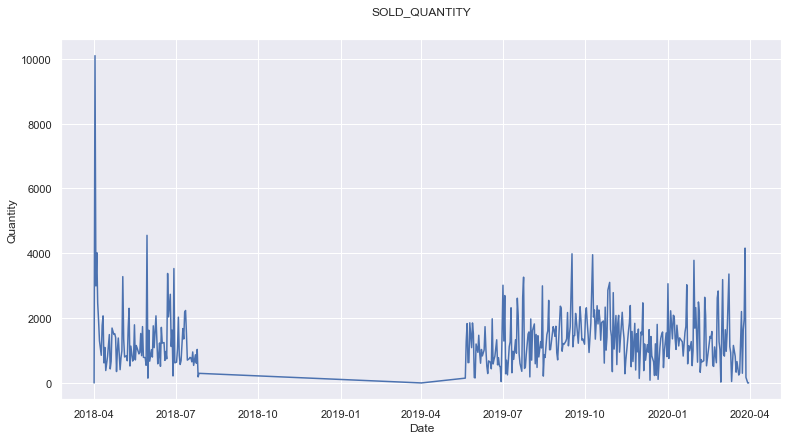

In [289]:
plot_by_date(sold_by_date,'SOLD_QUANTITY')

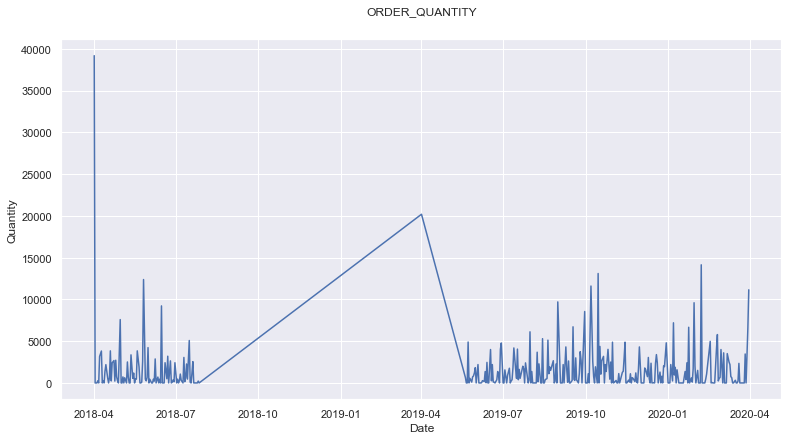

In [290]:
plot_by_date(order_by_date,'ORDER_QUANTITY')

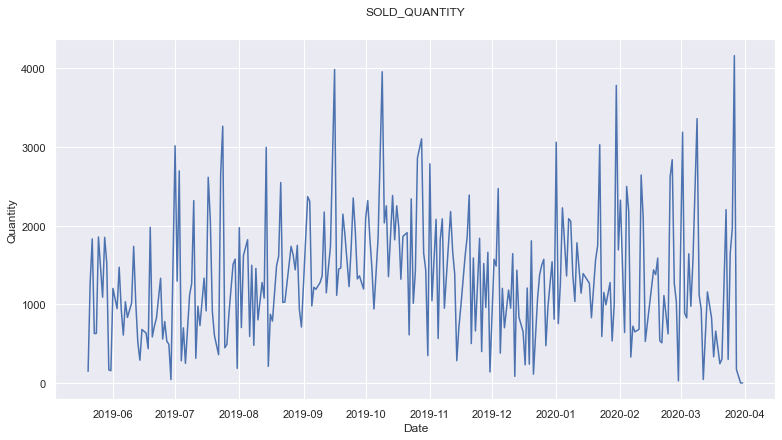

In [291]:
# remove data before 201905 
# maybe there is a more mathematical way of reasoning
sold_by_date = sold_by_date[sold_by_date['DATE'] > pd.to_datetime('2019-05-01')]
plot_by_date(sold_by_date,'SOLD_QUANTITY')

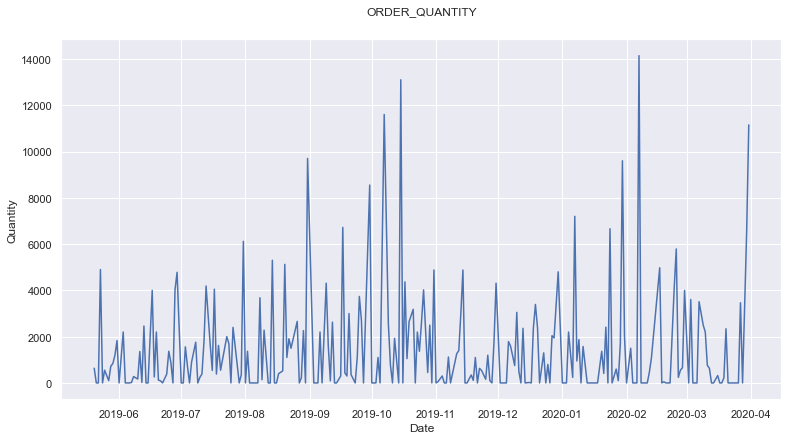

In [292]:
order_by_date = order_by_date[order_by_date['DATE'] > pd.to_datetime('2019-05-01')]
plot_by_date(order_by_date,'ORDER_QUANTITY')

In [293]:
sold_by_date.shape

(264, 2)

In [297]:
min(sold_by_date.DATE)

Timestamp('2019-05-20 00:00:00')

In [296]:
max(sold_by_date.DATE)

Timestamp('2020-03-31 00:00:00')

In [299]:
duration = (max(sold_by_date.DATE) - min(sold_by_date.DATE)).days
duration

316

In [300]:
# need to fill in the missing dates
def daterange(date1, date2):
    daterange_serial = []
    for n in range(int ((date2 - date1).days)+1):
        daterange_serial.append(date1 + pd.DateOffset(n))
    return daterange_serial

In [301]:
daterange_serial = daterange(min(sold_by_date.DATE), max(sold_by_date.DATE))

In [302]:
len(daterange_serial)

317

In [303]:
daterange_serial[0:10]

[Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-21 00:00:00'),
 Timestamp('2019-05-22 00:00:00'),
 Timestamp('2019-05-23 00:00:00'),
 Timestamp('2019-05-24 00:00:00'),
 Timestamp('2019-05-25 00:00:00'),
 Timestamp('2019-05-26 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-05-28 00:00:00'),
 Timestamp('2019-05-29 00:00:00')]

In [305]:
df_dates = pd.DataFrame(daterange_serial, columns = ['DATE'])
df_dates.head()

,DATE
0,2019-05-20
1,2019-05-21
2,2019-05-22
3,2019-05-23
4,2019-05-24


In [309]:
sold_by_date = pd.merge(df_dates, sold_by_date, how="left", on="DATE")
sold_by_date = sold_by_date.fillna(0)
sold_by_date.head

<bound method NDFrame.head of           DATE  SOLD_QUANTITY
0   2019-05-20          148.0
1   2019-05-21         1275.0
2   2019-05-22         1831.0
3   2019-05-23          626.5
4   2019-05-24          631.0
..         ...            ...
312 2020-03-27         4161.0
313 2020-03-28          171.0
314 2020-03-29            0.0
315 2020-03-30            0.0
316 2020-03-31            0.0

[317 rows x 2 columns]>

In [310]:
order_by_date = pd.merge(df_dates, order_by_date, how="left", on="DATE")
order_by_date = order_by_date.fillna(0)
order_by_date.head

<bound method NDFrame.head of           DATE  ORDER_QUANTITY
0   2019-05-20           636.0
1   2019-05-21             0.0
2   2019-05-22             0.0
3   2019-05-23          4900.0
4   2019-05-24             0.0
..         ...             ...
312 2020-03-27          3465.0
313 2020-03-28             0.0
314 2020-03-29             0.0
315 2020-03-30          6602.0
316 2020-03-31         11150.0

[317 rows x 2 columns]>

In [311]:
sold_order_by_date = pd.merge(sold_by_date, order_by_date, how="left", on="DATE")
sold_order_by_date.head()

,DATE,SOLD_QUANTITY,ORDER_QUANTITY
0,2019-05-20,148.0,636.0
1,2019-05-21,1275.0,0.0
2,2019-05-22,1831.0,0.0
3,2019-05-23,626.5,4900.0
4,2019-05-24,631.0,0.0


In [316]:
sold_order_by_date['sold_acc'] = sold_order_by_date.SOLD_QUANTITY.cumsum()
sold_order_by_date['order_acc'] = sold_order_by_date.ORDER_QUANTITY.cumsum()
sold_order_by_date['overstock'] = sold_order_by_date['order_acc'] - sold_order_by_date['sold_acc']
sold_order_by_date.head()

,DATE,SOLD_QUANTITY,ORDER_QUANTITY,sold_acc,order_acc,overstock
0,2019-05-20,148.0,636.0,148.0,636.0,488.0
1,2019-05-21,1275.0,0.0,1423.0,636.0,-787.0
2,2019-05-22,1831.0,0.0,3254.0,636.0,-2618.0
3,2019-05-23,626.5,4900.0,3880.5,5536.0,1655.5
4,2019-05-24,631.0,0.0,4511.5,5536.0,1024.5


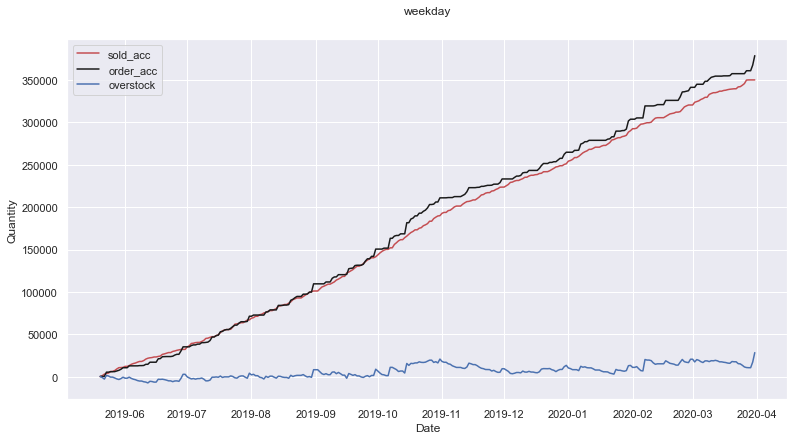

In [319]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.plot(sold_order_by_date.DATE, sold_order_by_date['sold_acc'],'r')
ax.plot(sold_order_by_date.DATE, sold_order_by_date['order_acc'],'k')
ax.plot(sold_order_by_date.DATE, sold_order_by_date['overstock'],'b')

ax.set_title(col)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
ax.legend(['sold_acc', 'order_acc', 'overstock'])

## Next Step: differentiate between diseases